In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

In [4]:
data = pd.read_csv("data.csv").drop(["Unnamed: 0", "year"], axis=1)
data

,"mid salary, hryvnias",population (thousands),fertility rate,mortality rate,GDP
0,125.23,51297.1,1.36,15.2,-10.0
1,143.09,50818.4,1.27,14.9,-3.0
2,152.83,50370.8,1.21,14.4,-1.9
3,177.39,49918.1,1.13,14.9,-0.2
4,231.04,49429.8,1.12,15.4,5.9
5,311.62,48923.2,1.08,15.3,8.8
6,375.98,48457.1,1.10,15.7,5.3
7,462.58,48003.5,1.17,16.0,9.5
8,590.53,47622.4,1.22,16.0,11.8
9,806.14,47280.8,1.21,16.6,3.1


EDA

Correlation matrix

<AxesSubplot:>

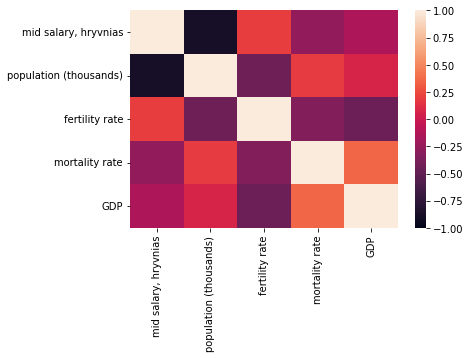

In [6]:
sns.heatmap(data.corr(), vmin=-1, vmax=1)

In [7]:
data.corr()

,"mid salary, hryvnias",population (thousands),fertility rate,mortality rate,GDP
"mid salary, hryvnias",1.000000,-0.878705,0.193474,-0.271146,-0.142770
population (thousands),-0.878705,1.000000,-0.443265,0.184113,0.064762
fertility rate,0.193474,-0.443265,1.000000,-0.335953,-0.451300
mortality rate,-0.271146,0.184113,-0.335953,1.000000,0.355561
GDP,-0.142770,0.064762,-0.451300,0.355561,1.000000


How parameters affect on population.

In [10]:
data_find_rel = data.drop("population (thousands)", axis=1)
for col in data_find_rel.columns:
    print(f"{col} and Population p-value: {stats.ttest_rel(data['population (thousands)'], data_find_rel[col])[1]}")

mid salary, hryvnias and Population p-value: 1.7048897408701987e-22
fertility rate and Population p-value: 7.099811727109381e-31
mortality rate and Population p-value: 7.139507982730481e-31
GDP and Population p-value: 7.070936493118624e-31


**Conclusions**
As we see, all parameters have effect on population, but good prediction model may be non-linear.